## Importing Modules

In [1]:
import matplotlib as mpl
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Logs and Semi-Logs

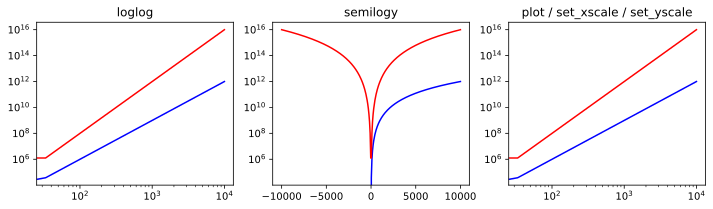

In [2]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

x = np.linspace(-1e4, 1e4, 300)
y1, y2 = x**3, x**4

axes[0].set_title('loglog')
axes[0].loglog(x, y1, 'b', x, y2, 'r')

axes[1].set_title('semilogy')
axes[1].semilogy(x, y1, 'b', x, y2, 'r')

axes[2].set_title('plot / set_xscale / set_yscale')
axes[2].plot(x, y1, 'b', x, y2, 'r')
axes[2].set_xscale('log')
axes[2].set_yscale('log')

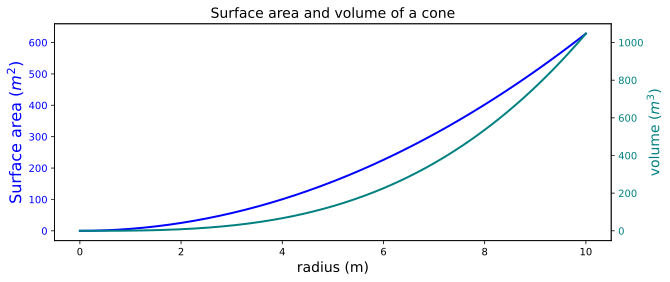

In [3]:
fig, ax1 = plt.subplots(figsize=(10, 4))

r = h = np.linspace(0, 10, 200)
a = 2 * np.pi * r * h 
v = (h * np.pi / 3) * r ** 2

ax1.set_title("Surface area and volume of a cone", fontsize=14)
ax1.set_xlabel("radius (m)", fontsize=14)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"Surface area ($m^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color="teal")
ax2.set_ylabel(r"volume ($m^3$)", fontsize=14, color="teal")
for label in ax2.get_yticklabels():
    label.set_color("teal")

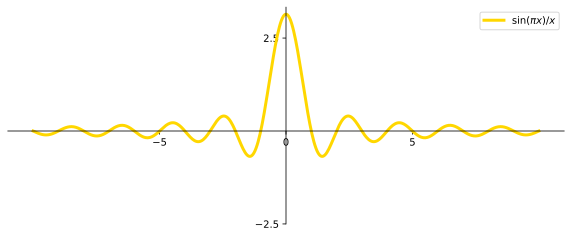

In [4]:
x = np.linspace(-10, 10, 500)
y = np.sin(np.pi * x) / x

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, y, lw=3, color="gold", label=r"$\sin(πx)/x$")

#remove
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.spines['left].set_color('gold')
#ax.spines[:].set_color('gold')

#remove spine tick
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#move #each of these can be deleted to omit one spine of the axes. 
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.set_xticks([-5,0,5])
ax.set_yticks([-2.5,2.5])

ax.legend()

 ## Advanced Layouts for axes

> ### Insets

In [5]:
y, x = sp.symbols('y, x')
y = 1/(1 + x**4) + 0.6/(1 + ((2 - x**2)/0.1)**2)
y

0.6/(400.0*(1 - 0.5*x**2)**2 + 1) + 1/(x**4 + 1)

In [6]:
y_prime = sp.diff(y, x)
y_prime

-4*x**3/(x**4 + 1)**2 + 0.003*x*(1 - 0.5*x**2)/((1 - 0.5*x**2)**2 + 0.0025)**2

In [7]:
sp.solve(y_prime, x)

[-1.41374121722157,
 -1.28432390895433,
 -0.0273331115903007,
 0.0,
 0.0273331115903007,
 1.28432390895433,
 1.41374121722157,
 -1.47620183085011 - 0.146676873522876*I,
 -1.47620183085011 + 0.146676873522876*I,
 1.47620183085011 - 0.146676873522876*I,
 1.47620183085011 + 0.146676873522876*I]

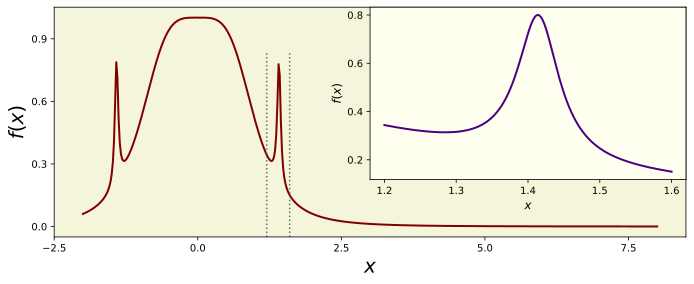

In [8]:
fig = plt.figure(figsize=(11, 4))

def f(x):
    return 1/(1 + x**4) + 0.6/(1 + ((2 - x**2)/0.1)**2)

def plot_and_format_axes(ax, x, f, color, fontsize):
    ax.plot(x, f(x), linewidth=2, color=color)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
    
#main
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor='beige')
x = np.linspace(-2, 8, 500)
red = "maroon"
plot_and_format_axes(ax, x, f, red, 20)

#inset
x0, x1 = 1.2, 1.6
ax.axvline(x0, ymax=0.8, color="dimgrey", linestyle=":")
ax.axvline(x1, ymax=0.8, color="dimgrey", linestyle=":")

ax_insert = fig.add_axes([0.5, 0.35, 0.4, 0.6], facecolor='ivory')
x = np.linspace(x0, x1, 500)
purple = "indigo"
plot_and_format_axes(ax_insert, x, f, purple, 12)

> ### Subplots

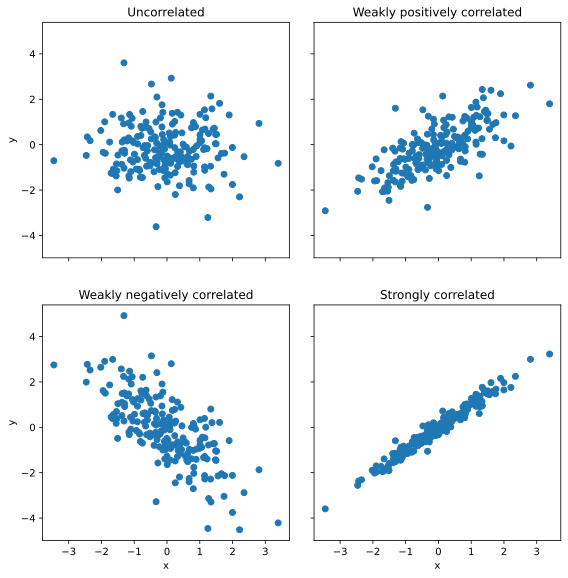

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, 
                         sharey=True, squeeze=False)

x1 = np.random.randn(200)
x2 = np.random.randn(200)

axes[0, 0].set_title("Uncorrelated")
axes[0, 0].scatter(x1, x2)

axes[0, 1].set_title("Weakly positively correlated")
axes[0, 1].scatter(x1, 0.7 * x1 + 0.7 * x2)

axes[1, 0].set_title("Weakly negatively correlated")
axes[1, 0].scatter(x1, -x1 + x2)

axes[1, 1].set_title("Strongly correlated")
axes[1, 1].scatter(x1, x1 + 0.2 * x2)

axes[1, 1].set_xlabel("x")
axes[1, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[1, 0].set_ylabel("y")

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=1,
                    wspace=0.1,hspace=0.2)

> ### Subplot2grid

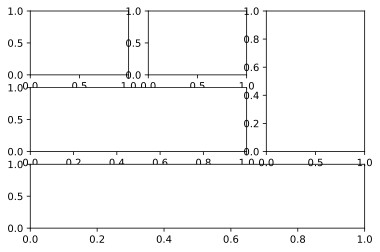

In [10]:
#plt.subplot2grid((nrows, ncols), (row, col))

ax0 = plt.subplot2grid((3, 3), (0, 0))
ax1 = plt.subplot2grid((3, 3), (0, 1))
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
ax4 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)

> ### GridSpec

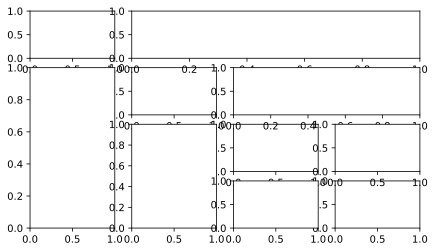

In [11]:
fig = plt.figure(figsize=(7, 4))
gs = mpl.gridspec.GridSpec(4, 4)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[2, 2])
ax3 = fig.add_subplot(gs[3, 3])
ax4 = fig.add_subplot(gs[0, 1:])
ax5 = fig.add_subplot(gs[1:, 0])
ax6 = fig.add_subplot(gs[1, 2:])
ax7 = fig.add_subplot(gs[2:, 1])
ax8 = fig.add_subplot(gs[2, 3])
ax9 = fig.add_subplot(gs[3, 2])

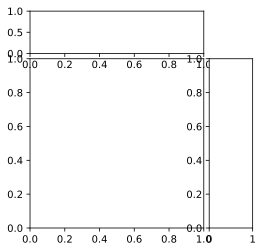

In [12]:
fig = plt.figure(figsize=(4, 4))
gs = mpl.gridspec.GridSpec(2, 2, width_ratios = [4, 1], 
                           height_ratios = [1, 4], wspace=0.05, hspace=0.05)
ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 1])